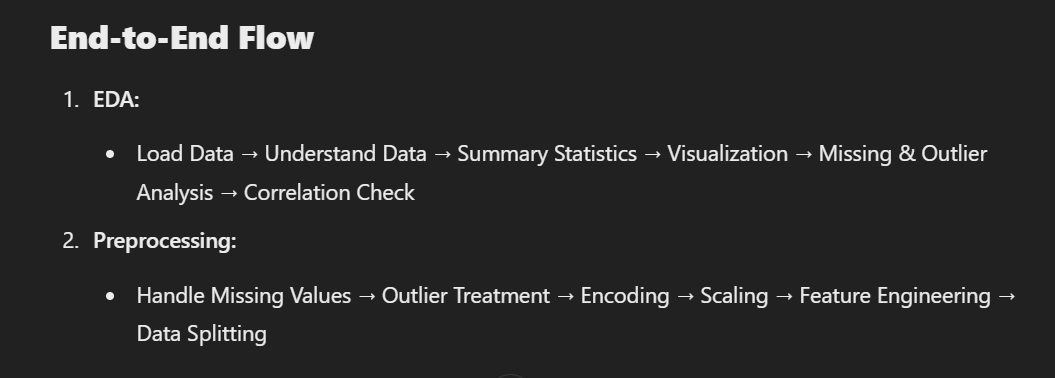

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("processed_data.csv")  # Load processed dataset

In [2]:
#cols=["special_event","staff_experience","waste_category","day_of_week"]
cols=["special_event","staff_experience","waste_category"]
df[cols]=df[cols].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   meals_served      910 non-null    int64   
 1   kitchen_staff     910 non-null    int64   
 2   temperature_C     910 non-null    float64 
 3   humidity_percent  910 non-null    float64 
 4   day_of_week       910 non-null    int64   
 5   special_event     910 non-null    category
 6   past_waste_kg     910 non-null    float64 
 7   staff_experience  910 non-null    category
 8   waste_category    910 non-null    category
 9   food_waste_kg     910 non-null    float64 
dtypes: category(3), float64(4), int64(3)
memory usage: 53.0 KB


# data splitting

In [3]:
x=df.drop(columns="food_waste_kg")
y=df["food_waste_kg"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
display(x_train)
display(y_train)

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
706,324,15,21.050609,39.937701,6,0,28.620499,Intermediate,meat
260,356,14,24.857269,81.427774,1,0,25.306998,EXPERT,meat
299,120,11,23.894894,45.238492,4,0,15.157748,Beginner,meat
428,475,10,14.742371,84.385258,0,0,25.349112,Beginner,grains
594,153,8,15.925696,53.578454,3,0,40.001506,Intermediate,dairy
...,...,...,...,...,...,...,...,...,...
106,273,6,24.838464,71.865377,0,0,36.815688,Intermediate,vegetables
270,246,17,27.149193,80.128814,5,0,27.068383,Beginner,dairy
860,274,8,26.926856,43.603823,0,0,39.537447,Intermediate,dairy
435,466,8,30.559835,88.291983,2,0,37.148635,Beginner,vegetables


706    50.543875
260    42.545294
299    29.371951
428    48.807997
594    36.609761
         ...    
106    37.967789
270    44.271496
860    49.143668
435    57.511780
102    36.163483
Name: food_waste_kg, Length: 819, dtype: float64

## Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_train["waste_category"]=encoder.fit_transform(x_train["waste_category"])
x_test["waste_category"]=encoder.transform(x_test["waste_category"])
x_test

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
867,346,11,18.981269,53.152470,1,1,39.054114,Intermediate,3
439,468,7,11.910421,81.837695,0,0,47.812859,Beginner,2
342,496,16,28.648130,86.952518,3,0,40.833530,EXPERT,0
737,161,9,16.984193,58.880003,1,0,11.165941,EXPERT,1
786,428,5,10.025737,37.647238,3,0,17.503032,Intermediate,0
...,...,...,...,...,...,...,...,...,...
259,200,10,14.266619,62.817795,5,0,5.073969,Beginner,0
462,341,9,5.844803,44.349527,6,0,36.750322,EXPERT,2
110,269,16,23.561966,45.401654,4,0,6.084959,Beginner,1
673,385,14,34.019514,49.264866,6,0,24.851775,Intermediate,2


In [5]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
x_train[['staff_experience',"special_event"]]=ordinal_encoder.fit_transform(x_train[['staff_experience',"special_event"]])
x_test[['staff_experience',"special_event"]]=ordinal_encoder.transform(x_test[['staff_experience',"special_event"]])
x_test

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
867,346,11,18.981269,53.152470,1,1.0,39.054114,2.0,3
439,468,7,11.910421,81.837695,0,0.0,47.812859,0.0,2
342,496,16,28.648130,86.952518,3,0.0,40.833530,1.0,0
737,161,9,16.984193,58.880003,1,0.0,11.165941,1.0,1
786,428,5,10.025737,37.647238,3,0.0,17.503032,2.0,0
...,...,...,...,...,...,...,...,...,...
259,200,10,14.266619,62.817795,5,0.0,5.073969,0.0,0
462,341,9,5.844803,44.349527,6,0.0,36.750322,1.0,2
110,269,16,23.561966,45.401654,4,0.0,6.084959,0.0,1
673,385,14,34.019514,49.264866,6,0.0,24.851775,2.0,2


## Normalization

In [6]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
scaler = RobustScaler()
"""
x_train[["meals_served","kitchen_staff","temperature_C","humidity_percent","day_of_week","past_waste_kg"]]=scaler.fit_transform(x_train[["meals_served","kitchen_staff","temperature_C","humidity_percent","day_of_week","past_waste_kg"]])
x_test[["meals_served","kitchen_staff","temperature_C","humidity_percent","day_of_week","past_waste_kg"]]=scaler.transform(x_test[["meals_served","kitchen_staff","temperature_C","humidity_percent","day_of_week","past_waste_kg"]])
x_test
"""
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
#x_test

In [7]:
# binary encoder
"""
from category_encoders import OneHotEncoder
ohe=OneHotEncoder(cols=["day_of_week"],use_cat_names=True)
x_train=ohe.fit_transform(x_train)

x_test=ohe.transform(x_test)
"""

'\nfrom category_encoders import OneHotEncoder\nohe=OneHotEncoder(cols=["day_of_week"],use_cat_names=True)\nx_train=ohe.fit_transform(x_train)\n\nx_test=ohe.transform(x_test)\n'

In [8]:
#x_train


# Machine learning

## Linear regression algorithm

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred1=lr.predict(x_test)
y_train_pred=lr.predict(x_train)

In [11]:
mae=mean_absolute_error(y_test,y_pred1)
mse=mean_squared_error(y_test,y_pred1)
r2=r2_score(y_test,y_pred1)
print(f"Mean squared error for linear regression test: {mse:.4f}")
print(f"R2 score for linear regression test:  {r2:.4f}")
print(f"Mean absolute error for linear regression test: {mae:.4f}\n")
mse2=mean_squared_error(y_train,y_train_pred)
r22=r2_score(y_train,y_train_pred)
mae2=mean_absolute_error(y_train,y_train_pred)
print(f"Mean squared error for linear regression train: {mse2:.4f}")
print(f"R2 score for linear regression train: {r22:.4f}")
print(f"Mean absolute error for linear regression train: {mae2:.4f}")

Mean squared error for linear regression test: 247.9691
R2 score for linear regression test:  0.7262
Mean absolute error for linear regression test: 6.3626

Mean squared error for linear regression train: 108.6731
R2 score for linear regression train: 0.8580
Mean absolute error for linear regression train: 5.1710


In [12]:
lr.intercept_
coef=lr.coef_.round(3)

In [13]:
print("Linear Regression Equation: y =",lr.intercept_.round(3),' + ', coef[0], "* meals_served +\n", coef[1], "* kitchen_staff +", coef[2], "* temperature_C +", coef[3], "* humidity_percent +", coef[4], "* past_waste_kg ")

Linear Regression Equation: y = 39.514  +  9.568 * meals_served +
 2.484 * kitchen_staff + 0.995 * temperature_C + 0.565 * humidity_percent + -1.017 * past_waste_kg 


#

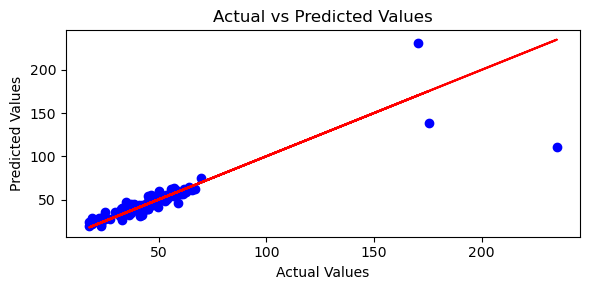

In [14]:
plt.figure(figsize=(6,3))
plt.scatter(y_test, y_pred1, color='blue')
plt.plot(y_test, y_test, color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

## polynomial linear regression algorithm

In [15]:
from sklearn.preprocessing import PolynomialFeatures


### Polynomial Degree 2

In [16]:
poly_reg2=PolynomialFeatures(degree=2)

In [17]:
x_poly=poly_reg2.fit_transform(x_train)
x_poly_test = poly_reg2.transform(x_test)

lin_reg_2=LinearRegression()
lin_reg_2.fit(x_poly,y_train)

LinearRegression()

In [18]:
y_pred_poly = lin_reg_2.predict(x_poly_test)
mse_test_poly_deg2=mean_squared_error(y_pred_poly,y_test)
r2_test_poly_deg2 = r2_score(y_test, y_pred_poly)
mae_test_poly_deg2=mean_absolute_error(y_pred_poly,y_test)

mse_train_poly_deg2=mean_squared_error(lin_reg_2.predict(x_poly),y_train)
r2_train_poly_deg2= r2_score(y_train, lin_reg_2.predict(x_poly))
mae_train_poly_deg2=mean_absolute_error(y_train, lin_reg_2.predict(x_poly))


print(f'MSE for deg 2 polynomial regression on test data: {mse_test_poly_deg2:.4f}')
print(f'R2 score for deg 2 polynomial regression on test data: {r2_test_poly_deg2:.4f}')
print(f'MAE for deg 2 polynomial regression on test data: {mae_test_poly_deg2:.4f}\n')

print(f'MSE for deg 2 polynomial regression on train data: {mse_train_poly_deg2:.4f}')
print(f'R2 score for deg 2 polynomial regression on train data: {r2_train_poly_deg2:.4f}')
print(f'MAE for deg 2 polynomial regression on train data: {mae_train_poly_deg2:.4f}')


MSE for deg 2 polynomial regression on test data: 134.1384
R2 score for deg 2 polynomial regression on test data: 0.8519
MAE for deg 2 polynomial regression on test data: 5.8041

MSE for deg 2 polynomial regression on train data: 58.2533
R2 score for deg 2 polynomial regression on train data: 0.9239
MAE for deg 2 polynomial regression on train data: 4.9238


# Comment

the best model that can be used to fit the data is linear regression 
as we increase the degree of the polynomial regression the model is going to overfitting the data


## using ridge regression to overcome model overfitting

In [19]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=20,max_iter=10)

In [20]:
ridge_reg.fit(x_poly,y_train)

Ridge(alpha=20, max_iter=10)

In [21]:
y_pred_poly = ridge_reg.predict(x_poly_test)
mse_test_ridge_poly_deg2=mean_squared_error(y_pred_poly,y_test)
r2_test_ridge_poly_deg2 = r2_score(y_test, y_pred_poly)
mae_test_ridge_poly_deg2=mean_absolute_error(y_test, y_pred_poly)

mse_train_ridge_poly_deg2=mean_squared_error(ridge_reg.predict(x_poly),y_train)
r2_train_ridge_poly_deg2 = r2_score(y_train, ridge_reg.predict(x_poly))
mae_train_ridge_poly_deg2=mean_absolute_error(y_train, ridge_reg.predict(x_poly))


print(f'MSE for deg 2 polynomial regression on test data using Ridge (L2) : {mse_test_ridge_poly_deg2:.4f}')
print(f'R2 score for deg 2 polynomial regression on test data using Ridge (L2) : {r2_test_ridge_poly_deg2:.4f}')
print(f'MAE for deg 2 polynomial regression on test data using Ridge (L2) :{mae_test_ridge_poly_deg2:.4f}\n')

print(f'MSE for deg 2 polynomial regression on train data using Ridge (L2) : {mse_train_ridge_poly_deg2:.4f}')
print(f'R2 score for deg 2 polynomial regression on train data using Ridge (L2) : {r2_train_ridge_poly_deg2:.4f}')
print(f'MAE for deg 2 polynomial regression on train data using Ridge (L2) :{mae_train_ridge_poly_deg2:.4f}')


MSE for deg 2 polynomial regression on test data using Ridge (L2) : 150.3591
R2 score for deg 2 polynomial regression on test data using Ridge (L2) : 0.8340
MAE for deg 2 polynomial regression on test data using Ridge (L2) :5.8824

MSE for deg 2 polynomial regression on train data using Ridge (L2) : 59.4763
R2 score for deg 2 polynomial regression on train data using Ridge (L2) : 0.9223
MAE for deg 2 polynomial regression on train data using Ridge (L2) :4.9171


In [22]:
ridge_reg.coef_.round(1)

array([ 0. , 12. ,  1.9,  1.2,  1.6, -0.7,  4.3, 12.6, -0.8,  0.5, -0.1,
        1.3,  0.3, -0.5, -1.2,  2.7,  3.9, -1. , -0.2, -0.4, -0.3,  0.5,
        0.1,  1.2, -0.2, -0.5,  0.3,  0. ,  0.4, -0.5, -0.6, -0.3,  0.8,
       -0.4,  0.7, -0.3, -1.2,  0.2,  0.7, -0.3,  1. ,  1.5, -1.4, -0.1,
       -0.7,  4.3,  0.3, -0. ,  0.2, -0.6, -1. ,  0.5, -0. ,  0.4,  0. ])

## **using ridge regression decrease model overfitting and increase accuracy**

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor()

rf.fit(x_train, y_train)

RandomForestRegressor()

In [24]:
y_pred_rf = rf.predict(x_test)
y_train_rf = rf.predict(x_train)

mse_rf=mean_squared_error(y_test, y_pred_rf)
r2_rf=r2_score(y_test, y_pred_rf)
mae_rf=mean_absolute_error(y_test, y_pred_rf)

mse2_rf=mean_squared_error(y_train, y_train_rf)
r22_rf=r2_score(y_train, y_train_rf)
mae2_rf=mean_absolute_error(y_train,y_train_rf)

print(f"Mean squared error for random forest: {mse_rf:.4f}")
print(f"R2 score for random forest: {r2_rf:.4f}")
print(f"Mean absolute error for random forest: {mae_rf:.4f}\n")

print(f"Mean squared error for random forest on train data: {mse2_rf:.4f}")
print(f"R2 score for random forest on train data: {r22_rf:.4f}")
print(f"Mean absolute error for random forest on train data: {mae2_rf:.4f}")

Mean squared error for random forest: 101.0653
R2 score for random forest: 0.8884
Mean absolute error for random forest: 5.0542

Mean squared error for random forest on train data: 7.5586
R2 score for random forest on train data: 0.9901
Mean absolute error for random forest on train data: 1.7810


In [25]:
from sklearn.model_selection import GridSearchCV
param_grid= {
    "n_estimators":[81,82,85,90],
    "max_depth":[14,15,17],
    "min_samples_split":[2],
    "min_samples_leaf":[2],
    "bootstrap":[True],
    "ccp_alpha":[0,0.0001,0.00001],
   "max_samples":[0.8],
   "random_state":[42]
 }
grid_search=GridSearchCV(rf,param_grid,scoring="neg_mean_absolute_error")
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'ccp_alpha': [0, 0.0001, 1e-05],
                         'max_depth': [14, 15, 17], 'max_samples': [0.8],
                         'min_samples_leaf': [2], 'min_samples_split': [2],
                         'n_estimators': [81, 82, 85, 90],
                         'random_state': [42]},
             scoring='neg_mean_absolute_error')

In [26]:
best_params=grid_search.best_params_
print("Best Hyperparameters:",best_params)

Best Hyperparameters: {'bootstrap': True, 'ccp_alpha': 1e-05, 'max_depth': 14, 'max_samples': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 85, 'random_state': 42}


In [27]:
best_RFreg=RandomForestRegressor(**best_params)
best_RFreg.fit(x_train, y_train)

RandomForestRegressor(ccp_alpha=1e-05, max_depth=14, max_samples=0.8,
                      min_samples_leaf=2, n_estimators=85, random_state=42)

In [28]:
y_pred_rf = best_RFreg.predict(x_test)
y_train_rf = best_RFreg.predict(x_train)

mse_rf=mean_squared_error(y_test, y_pred_rf)
r2_rf=r2_score(y_test, y_pred_rf)
mae_rf=mean_absolute_error(y_test, y_pred_rf)

mse2_rf=mean_squared_error(y_train, y_train_rf)
r22_rf=r2_score(y_train, y_train_rf)
mae2_rf=mean_absolute_error(y_train,y_train_rf)

print(f"Mean squared error for random forest: {mse_rf:.4f}")
print(f"R2 score for random forest: {r2_rf:.4f}")
print(f"Mean absolute error for random forest: {mae_rf:.4f}\n")

print(f"Mean squared error for random forest on train data: {mse2_rf:.4f}")
print(f"R2 score for random forest on train data: {r22_rf:.4f}")
print(f"Mean absolute error for random forest on train data: {mae2_rf:.4f}")

Mean squared error for random forest: 122.5543
R2 score for random forest: 0.8647
Mean absolute error for random forest: 5.4431

Mean squared error for random forest on train data: 17.6443
R2 score for random forest on train data: 0.9769
Mean absolute error for random forest on train data: 2.5594


### **comment**

### This mean that random forest model is overfitting :
because the training accuracy is high but the validation test is low

## SGD Regressor

In [29]:
from sklearn.linear_model import SGDRegressor


In [30]:
X_train,X_val,Y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=42)
sgdrmodel=SGDRegressor()
sgdrmodel.fit(X_train,Y_train)

SGDRegressor()

In [31]:
y_train_pred=sgdrmodel.predict(X_train)
y_val_pred=sgdrmodel.predict(X_val)
y_test_pred=sgdrmodel.predict(x_test)

mse_train_sgd=mean_squared_error(Y_train,y_train_pred)
r2_train_sgd=r2_score(Y_train,y_train_pred)
mae_train_sgd=mean_absolute_error(Y_train,y_train_pred)
mse_test_sgd=mean_squared_error(y_test,y_test_pred)
r2_test_sgd=r2_score(y_test,y_test_pred)
mae_test_sgd=mean_absolute_error(y_test,y_test_pred)

print(f"Mean square error on train set for SGD Regressor: {mean_squared_error(Y_train,y_train_pred):.4f}")
print(f"R2 score on train set for SGD Regressor: {r2_score(Y_train,y_train_pred):.4f}")
print(f"Mean absolute error on train set for SGD Regressor: {mean_absolute_error(Y_train,y_train_pred): .4f}\n")

print(f"Mean square error on validation set for SGD Regressor: {mean_squared_error(y_val,y_val_pred):.4f}")
print(f"R2 score on validation set for SGD Regressor: {r2_score(y_val,y_val_pred):.4f}")
print(f"Mean absolute error on validation set for SGD Regressor: {mean_absolute_error(y_val,y_val_pred): .4f}\n")

print(f"Mean square error on test set for SGD Regressor: {mean_squared_error(y_test,y_test_pred):.4f}")
print(f"R2 score on test set for SGD Regressor: {r2_score(y_test,y_test_pred): .4f}")
print(f"Mean absolute error on test set for SGD Regressor: {mean_absolute_error(y_test,y_test_pred): .4f}")

Mean square error on train set for SGD Regressor: 129.4092
R2 score on train set for SGD Regressor: 0.8448
Mean absolute error on train set for SGD Regressor:  5.3930

Mean square error on validation set for SGD Regressor: 28.7971
R2 score on validation set for SGD Regressor: 0.7847
Mean absolute error on validation set for SGD Regressor:  4.3285

Mean square error on test set for SGD Regressor: 253.8616
R2 score on test set for SGD Regressor:  0.7197
Mean absolute error on test set for SGD Regressor:  6.2731


# Fine -Tune SGDRwgressor Hyperparameters

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid= {
    "eta0":[0.001,0.01,0.1,1],
    "max_iter":[500,2000,3000,5000],
    "learning_rate":["constant","invscaling","adaptive"]
}
sgd=SGDRegressor()
grid_search=GridSearchCV(sgd,param_grid,scoring="neg_mean_absolute_error")
grid_search.fit(X_train,Y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'eta0': [0.001, 0.01, 0.1, 1],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [500, 2000, 3000, 5000]},
             scoring='neg_mean_absolute_error')

In [33]:
best_params=grid_search.best_params_
print("Best Hyperparameters:",best_params)

Best Hyperparameters: {'eta0': 0.001, 'learning_rate': 'constant', 'max_iter': 5000}


In [34]:
best_sgd=SGDRegressor(**best_params)
best_sgd.fit(X_train,Y_train)

SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=5000)

In [35]:
y_val_pred=best_sgd.predict(X_val)
mean_squared_error(y_val,y_val_pred)
y_val_pred=best_sgd.predict(X_val)
r2_score(y_val,y_val_pred)

0.780300595216101

In [36]:
y_test_pred=best_sgd.predict(x_test)
y_train_pred=best_sgd.predict(X_train)


mse_train_fsgd=mean_squared_error(Y_train,y_train_pred)
r2_train_fsgd=r2_score(Y_train,y_train_pred)
mae_train_fsgd=mean_absolute_error(Y_train,y_train_pred)
mse_test_fsgd=mean_squared_error(y_test,y_test_pred)
r2_test_fsgd=r2_score(y_test,y_test_pred)
mae_test_fsgd=mean_absolute_error(y_test,y_test_pred)


print("MSE of SGD  on test data: ", mse_test_fsgd)
print("R2 score for SGD on test data: ",r2_test_fsgd)
print("MAE of SGD on test data: ", mae_test_fsgd)

print(f"\nMSE for training data using SGD: {mse_train_fsgd:.4f}")
print(f"R2 score for training data using SGD: {r2_train_fsgd:.4f}")
print(f"MAE for training data using SGD: {mae_train_fsgd:.4f}")


MSE of SGD  on test data:  246.75317463568234
R2 score for SGD on test data:  0.7275758090368826
MAE of SGD on test data:  6.301870952436167

MSE for training data using SGD: 118.7758
R2 score for training data using SGD: 0.8576
MAE for training data using SGD: 5.2783


## Gradient boosting regression

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=8,
                                n_estimators=100,
                                learning_rate=0.15, random_state=42)

gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.15, max_depth=8, random_state=42)

In [38]:
y_pred_gbr = gbr.predict(x_test)
y_train_gbr = gbr.predict(x_train)

mse_gbr=mean_squared_error(y_test, y_pred_gbr)
r2_gbr=r2_score(y_test, y_pred_gbr)
mae_gbr=mean_absolute_error(y_test, y_pred_gbr)

mse2_gbr=mean_squared_error(y_train, y_train_gbr)
r22_gbr=r2_score(y_train, y_train_gbr)
mae2_gbr=mean_absolute_error(y_train,y_train_gbr)

print("Mean squared error for Gradient boosting: ",mse_gbr)
print("R2 score for Gradient boosting: ",r2_gbr)
print("Mean absolute error for Gradient boosting: ",mae_gbr)
print("Mean squared error for Gradient boosting on train data: ",mse2_gbr)
print("R2 score for Gradient boosting on train data: ",r22_gbr)
print("Mean absolute error for Gradient boosting on train data: ",mae2_gbr)

Mean squared error for Gradient boosting:  96.48520889906311
R2 score for Gradient boosting:  0.8934769329187238
Mean absolute error for Gradient boosting:  5.022868632674898
Mean squared error for Gradient boosting on train data:  0.036022878985104895
R2 score for Gradient boosting on train data:  0.9999529252640799
Mean absolute error for Gradient boosting on train data:  0.1387996350713833


## XGBoost 

In [39]:
from xgboost import XGBRegressor

# Create an instance of XGBRegressor
xgbm = XGBRegressor(n_estimators=50,
    learning_rate=.4,
    max_depth=4,
    early_stopping_rounds=8,
    random_state=42)
xgbm.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=8,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [40]:
y_pred_xgb = xgbm.predict(x_test)
y_train_xgb = xgbm.predict(x_train)

mse_xgb=mean_squared_error(y_test, y_pred_xgb)
r2_xgb=r2_score(y_test, y_pred_xgb)
mae_xgb=mean_absolute_error(y_test, y_pred_xgb)

mse2_xgb=mean_squared_error(y_train, y_train_xgb)
r22_xgb=r2_score(y_train, y_train_xgb)
mae2_xgb=mean_absolute_error(y_train, y_train_xgb)

print(f"Mean squared error for Gradient boosting test data: {mse_xgb:.4f}")
print(f"R2 score for Gradient boosting test data: {r2_xgb:.4f}")
print(f"Mean absolute error for Gradient boosting test data: {mae_xgb:.4f}\n")

print(f"Mean squared error for Gradient boosting on train data: {mse2_xgb:.4f}")
print(f"R2 score for Gradient boosting on train data: {r22_xgb:.4f}")
print(f"Mean absolute error for Gradient boosting on train data: {mae2_xgb:.4f}")

Mean squared error for Gradient boosting test data: 134.7563
R2 score for Gradient boosting test data: 0.8512
Mean absolute error for Gradient boosting test data: 5.2659

Mean squared error for Gradient boosting on train data: 21.6633
R2 score for Gradient boosting on train data: 0.9717
Mean absolute error for Gradient boosting on train data: 3.7408


# TESTING

In [41]:
df2=pd.read_csv("test.csv")
df3=pd.read_csv("test.csv")
df2

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT
...,...,...,...,...,...,...,...,...,...,...,...
906,1044,2022-03-29,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS
907,1045,2022-11-27,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy
908,1046,2023-04-12,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt
909,1048,2022-02-14,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT


# Data preprocessing

## Drop unnecessary

In [42]:
df2.drop(columns=["ID","date"],inplace=True)
df2

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT
...,...,...,...,...,...,...,...,...,...
906,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS
907,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy
908,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt
909,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT


In [43]:
df2["temperature_C"].value_counts()

temperature_C
-10.000000    12
 60.000000     9
 27.887273     1
 21.981973     1
 31.145476     1
              ..
 28.915895     1
 22.022596     1
 11.782007     1
 16.214506     1
 23.708015     1
Name: count, Length: 892, dtype: int64

## Data Correction

In [44]:
def lower_case_columns(df2, cols):
    df2[cols] = df2[cols].astype(str).apply(lambda x: x.str.lower())
    return df2

df2 = lower_case_columns(df2, ["waste_category"])

display(df2["waste_category"].value_counts())

waste_category
meat          379
dairy         180
vegetables    176
grains        176
Name: count, dtype: int64

In [45]:
df2["staff_experience"] = df2["staff_experience"].replace("intermediate", "Intermediate")
display(df2["staff_experience"].value_counts())

staff_experience
Intermediate    370
Beginner        191
EXPERT          186
Name: count, dtype: int64

## change data types

In [46]:
cols=["special_event","staff_experience","waste_category"]
df2[cols]=df2[cols].astype("category")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   meals_served      911 non-null    int64   
 1   kitchen_staff     911 non-null    int64   
 2   temperature_C     911 non-null    float64 
 3   humidity_percent  911 non-null    float64 
 4   day_of_week       911 non-null    int64   
 5   special_event     911 non-null    category
 6   past_waste_kg     911 non-null    float64 
 7   staff_experience  747 non-null    category
 8   waste_category    911 non-null    category
dtypes: category(3), float64(3), int64(3)
memory usage: 46.0 KB


### fill null in staff experience with mode

In [47]:
df2["staff_experience"] = df2["staff_experience"].fillna(df2["staff_experience"].mode()[0])
pd.DataFrame({"Null %":(df2.isnull().sum()/df2.shape[0]*100),"Null count":df2.isnull().sum()}).T

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
Null %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# check duplicates
df2.duplicated().sum()

0

In [49]:
def handle_outlier(data,columns,method="IQR",threshold=1.5,strategy="replace"):
    for col in columns:
        if method=="IQR":
            Q1=data[col].quantile(0.25)
            Q3=data[col].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1-threshold*IQR
            upper_bound=Q3+threshold*IQR
        elif method=="Z-score":
            mean=data[col].mean()
            std=data[col].std()
            lower_bound=mean-threshold*std
            upper_bound=mean+threshold*std
        else:
            print("Invalid method")
        if strategy=="replace":
            #with median
            data[col]=np.clip(data[col],lower_bound,upper_bound)
        elif strategy=="remove":
            data=data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]
        else:
            print("Invalid strategy. choose 'replace' or 'remove'")
    return data
COLUM_TO_Process=df2[["temperature_C"]]
df2=handle_outlier(df2,COLUM_TO_Process,method="IQR",threshold=.75,strategy="replace")


## data Testing

In [50]:
X=df2
X

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,196,13,27.887273,45.362854,0,0,7.740587,Intermediate,dairy
1,244,15,10.317872,64.430475,1,0,42.311779,Intermediate,meat
2,148,16,27.714300,69.046113,1,0,41.184305,Beginner,meat
3,157,19,19.173902,46.292823,6,0,41.543492,Beginner,meat
4,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,meat
...,...,...,...,...,...,...,...,...,...
906,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,grains
907,483,11,24.912137,59.485091,6,0,36.470276,Intermediate,dairy
908,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,meat
909,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,meat


## Encoding

In [51]:
X["waste_category"]=encoder.transform(X["waste_category"])
X

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,196,13,27.887273,45.362854,0,0,7.740587,Intermediate,0
1,244,15,10.317872,64.430475,1,0,42.311779,Intermediate,2
2,148,16,27.714300,69.046113,1,0,41.184305,Beginner,2
3,157,19,19.173902,46.292823,6,0,41.543492,Beginner,2
4,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,2
...,...,...,...,...,...,...,...,...,...
906,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,1
907,483,11,24.912137,59.485091,6,0,36.470276,Intermediate,0
908,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,2
909,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,2


In [52]:
X[['staff_experience',"special_event"]]=ordinal_encoder.transform(X[['staff_experience',"special_event"]])
X


,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,196,13,27.887273,45.362854,0,0.0,7.740587,2.0,0
1,244,15,10.317872,64.430475,1,0.0,42.311779,2.0,2
2,148,16,27.714300,69.046113,1,0.0,41.184305,0.0,2
3,157,19,19.173902,46.292823,6,0.0,41.543492,0.0,2
4,297,10,26.375233,79.741064,0,0.0,26.525097,2.0,2
...,...,...,...,...,...,...,...,...,...
906,395,18,17.354199,45.138435,1,0.0,40.550668,2.0,1
907,483,11,24.912137,59.485091,6,0.0,36.470276,2.0,0
908,243,11,28.870945,70.508404,2,0.0,19.767203,2.0,2
909,406,10,19.061638,55.286642,0,0.0,28.560361,1.0,2


## Normalization

In [53]:
"""
X[["meals_served","kitchen_staff","temperature_C","humidity_percent","day_of_week","past_waste_kg"]]=scaler.transform(x_test[["meals_served","kitchen_staff","temperature_C","humidity_percent","day_of_week","past_waste_kg"]])
X
"""
X=scaler.transform(X)
X

array([[-0.5394402 ,  0.14285714,  0.41942257, ..., -0.85072304,
         0.        , -2.        ],
       [-0.29516539,  0.42857143, -0.92452255, ...,  0.72201716,
         0.        ,  0.        ],
       [-0.78371501,  0.57142857,  0.40619129, ...,  0.67072523,
        -2.        ,  0.        ],
       ...,
       [-0.30025445, -0.14285714,  0.49466716, ..., -0.30359863,
         0.        ,  0.        ],
       [ 0.52926209, -0.28571429, -0.25568124, ...,  0.09642671,
        -1.        ,  0.        ],
       [ 0.24427481, -0.85714286,  0.09973645, ...,  0.92560111,
         0.        ,  1.        ]])

In [54]:
#X=ohe.transform(X)

## Target statistics

In [55]:
mean_of_target=df["food_waste_kg"].mean()
vars_of_target=df["food_waste_kg"].var()
std_of_target=df["food_waste_kg"].std()
print(f"Mean of Target data: {mean_of_target}\nStanderd deviation of Target data: {std_of_target}\nVariance of Target data : {vars_of_target}")

Mean of Target data: 44.8363982191744
Standerd deviation of Target data: 27.949081478306724
Variance of Target data : 781.1511554810279


# Machine learning

## Prediction with Linear regression algorithm

In [56]:
y_pred_test=lr.predict(X)
y_pred_test.mean()
y_pred_test.std()
y_pred_test.var()
print(f"Mean of Prediction data: {y_pred_test.mean()}\nStanderd deviation of Prediction data: {y_pred_test.std()}\nVariance of Prediction data : {y_pred_test.var()}")

Mean of Prediction data: 44.813469195543604
Standerd deviation of Prediction data: 25.637084928863704
Variance of Prediction data : 657.2601236497705


# prediction with polynomial regression degree= 2
# Ridge regression

In [57]:
x_poly_test = poly_reg2.transform(X)
y_pred_test_poly = ridge_reg.predict(x_poly_test)
y_pred_test_poly.mean()
y_pred_test_poly.std()
y_pred_test_poly.var()
print(f"Mean of Prediction data: {y_pred_test_poly.mean()}\nStanderd deviation of Prediction data: {y_pred_test_poly.std()}\nVariance of Prediction data : {y_pred_test_poly.var()}")

Mean of Prediction data: 44.81697581109041
Standerd deviation of Prediction data: 26.15689061652963
Variance of Prediction data : 684.1829267250959


##  prediction with Random Forest

In [58]:
y_pred2_Test = rf.predict(X)
y_pred2_Test.mean()
y_pred2_Test.std()
y_pred2_Test.var()
print(f"Mean of Prediction data: {y_pred2_Test.mean()}\nStanderd deviation of Prediction data: {y_pred2_Test.std()}\nVariance of Prediction data : {y_pred2_Test.var()}")

Mean of Prediction data: 44.85348177128048
Standerd deviation of Prediction data: 27.362558147034203
Variance of Prediction data : 748.7095883498279


# prediction with Stochastic Gradient Descent Regression

In [59]:
y_pred3_Test = best_sgd.predict(X)
y_pred3_Test.mean()
y_pred3_Test.std()
y_pred3_Test.var()
print(f"Mean of Prediction data: {y_pred3_Test.mean()}\nStanderd deviation of Prediction data: {y_pred3_Test.std()}\nVariance of Prediction data : {y_pred3_Test.var()}")

Mean of Prediction data: 44.74674566501836
Standerd deviation of Prediction data: 24.748973706848467
Variance of Prediction data : 612.5116995422767


In [60]:
y_pred4_Test = xgbm.predict(X)
y_pred4_Test.mean()
y_pred4_Test.std()
y_pred4_Test.var()
print(f"Mean of Prediction data: {y_pred4_Test.mean()}\nStanderd deviation of Prediction data: {y_pred4_Test.std()}\nVariance of Prediction data : {y_pred4_Test.var()}")

Mean of Prediction data: 44.698604583740234
Standerd deviation of Prediction data: 26.165151596069336
Variance of Prediction data : 684.6151123046875


# prediction with Gradient Boosting Regression

In [61]:
y_pred5_Test = gbr.predict(X)
y_pred5_Test.mean()
y_pred5_Test.std()
y_pred5_Test.var()
print(f"Mean of Prediction data: {y_pred4_Test.mean()}\nStanderd deviation of Prediction data: {y_pred4_Test.std()}\nVariance of Prediction data : {y_pred4_Test.var()}")

Mean of Prediction data: 44.698604583740234
Standerd deviation of Prediction data: 26.165151596069336
Variance of Prediction data : 684.6151123046875


## Models comparison

Model Performance Comparison


,MSE (Train),R² (Train),MAE (Train),MSE (Test),R² (Test),MAE (Test)
Linear Reg.,108.673095,0.857986,5.171043,247.969126,0.726233,6.362611
Poly. Reg. (Deg 2),58.253262,0.923875,4.923765,134.138390,0.851906,5.804128
Poly. Reg. (Deg 2) L2,59.476262,0.922276,4.917081,150.359052,0.833998,5.882447
Random Forest Reg.(tune),17.644293,0.976942,2.559449,122.554260,0.864696,5.443081
SGD Regressor,129.409172,0.844803,5.392958,253.861610,0.719728,6.273080
SGD Reg.(fine tune),118.775783,0.857555,5.278332,246.753175,0.727576,6.301871
Gradient Boosting Reg.,0.036023,0.999953,0.138800,96.485209,0.893477,5.022869
XGB Reg.,21.663283,0.971690,3.740845,134.756287,0.851224,5.265902


<Figure size 500x500 with 0 Axes>

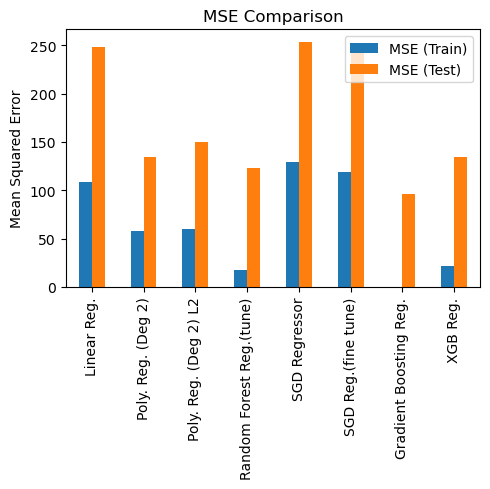

<Figure size 500x500 with 0 Axes>

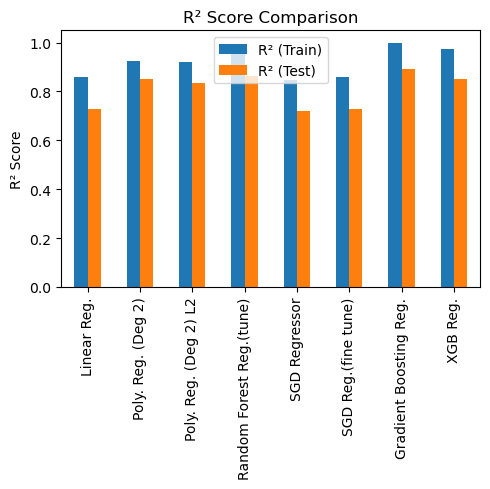

<Figure size 500x500 with 0 Axes>

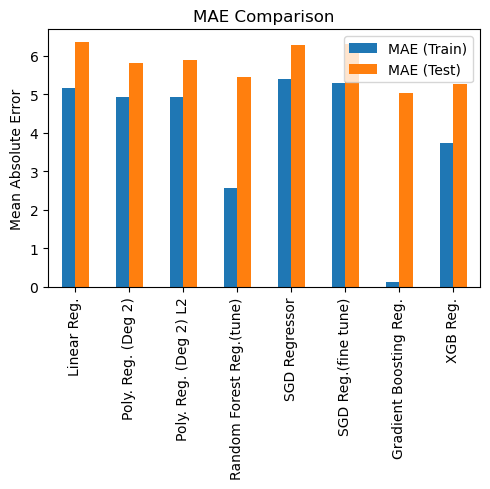

In [62]:
model_performance = {
    "Linear Reg.": {
        "MSE (Train)": globals().get("mse2", None),
        "R² (Train)": globals().get("r22", None),
        "MAE (Train)": globals().get("mae2", None),
        "MSE (Test)": globals().get("mse", None),
        "R² (Test)": globals().get("r2", None),
        "MAE (Test)": globals().get("mae", None),
    },
    "Poly. Reg. (Deg 2)": {
        "MSE (Train)": globals().get("mse_train_poly_deg2", None),
        "R² (Train)": globals().get("r2_train_poly_deg2", None),
        "MAE (Train)": globals().get("mae_train_poly_deg2", None),
        "MSE (Test)": globals().get("mse_test_poly_deg2", None),
        "R² (Test)": globals().get("r2_test_poly_deg2", None),
        "MAE (Test)": globals().get("mae_test_poly_deg2", None),
    },
    "Poly. Reg. (Deg 2) L2":{
        "MSE (Train)": globals().get("mse_train_ridge_poly_deg2", None),
        "R² (Train)": globals().get("r2_train_ridge_poly_deg2", None),
        "MAE (Train)": globals().get("mae_train_ridge_poly_deg2", None),
        "MSE (Test)": globals().get("mse_test_ridge_poly_deg2", None),
        "R² (Test)": globals().get("r2_test_ridge_poly_deg2", None),
        "MAE (Test)": globals().get("mae_test_ridge_poly_deg2", None),

    },

    "Random Forest Reg.(tune)": {
        "MSE (Train)": globals().get("mse2_rf", None),
        "R² (Train)": globals().get("r22_rf", None),
        "MAE (Train)": globals().get("mae2_rf", None),
        "MSE (Test)": globals().get("mse_rf", None),
        "R² (Test)": globals().get("r2_rf", None),
        "MAE (Test)": globals().get("mae_rf", None),
    },
    "SGD Regressor": {
        "MSE (Train)": globals().get("mse_train_sgd", None),
        "R² (Train)": globals().get("r2_train_sgd", None),
        "MAE (Train)": globals().get("mae_train_sgd", None),
        "MSE (Test)": globals().get("mse_test_sgd", None),
        "R² (Test)": globals().get("r2_test_sgd", None),
        "MAE (Test)": globals().get("mae_test_sgd", None),
    },
    "SGD Reg.(fine tune)": {
        "MSE (Train)": globals().get("mse_train_fsgd", None),
        "R² (Train)": globals().get("r2_train_fsgd", None),
        "MAE (Train)": globals().get("mae_train_fsgd", None),
        "MSE (Test)": globals().get("mse_test_fsgd", None),
        "R² (Test)": globals().get("r2_test_fsgd", None),
        "MAE (Test)": globals().get("mae_test_fsgd", None),
    },
    
    "Gradient Boosting Reg.": {
        "MSE (Train)": globals().get("mse2_gbr", None),
        "R² (Train)": globals().get("r22_gbr", None),
        "MAE (Train)": globals().get("mae2_gbr", None),
        "MSE (Test)": globals().get("mse_gbr", None),
        "R² (Test)": globals().get("r2_gbr", None),
        "MAE (Test)": globals().get("mae_gbr", None),
    },
    
    "XGB Reg.": {
        "MSE (Train)": globals().get("mse2_xgb", None),
        "R² (Train)": globals().get("r22_xgb", None),
        "MAE (Train)": globals().get("mae2_xgb", None),
        "MSE (Test)": globals().get("mse_xgb", None),
        "R² (Test)": globals().get("r2_xgb", None),
        "MAE (Test)": globals().get("mae_xgb", None),
    }
    }
df_performance = pd.DataFrame(model_performance).T

print("Model Performance Comparison")
display(df_performance)

plt.figure(figsize=(5, 5))
df_performance[['MSE (Train)', 'MSE (Test)']].plot(kind='bar', figsize=(5,5), title="MSE Comparison")
plt.ylabel("Mean Squared Error")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
df_performance[['R² (Train)', 'R² (Test)']].plot(kind='bar', figsize=(5,5), title="R² Score Comparison")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
df_performance[["MAE (Train)", 'MAE (Test)']].plot(kind='bar', figsize=(5,5), title="MAE Comparison")
plt.ylabel("Mean Absolute Error")
plt.tight_layout()
plt.show()

In [63]:
#y_pred2_Test

In [64]:
# Creating Submission file for Kaggle competition
# Author: [Badger Team]
# Date: 2025-02-10

#submitted_data=y_pred_test_poly       # polynomial deg 2 witg L2

#submitted_data=y_pred_test            # Linear Regression

#submitted_data=y_pred2_Test            # Random Forest regression with Tuning hyperparameter

#submitted_data=y_pred3_Test           # SGD regression with Tuning hyperparameter

#submitted_data=y_pred4_Test           # xgbm regression 

submitted_data=y_pred5_Test           # Gradient Boosting regression

submission = pd.DataFrame({
    "ID": df3.iloc[:, 0],  # Extract first column [ID] is a DataFrame
    "food_waste_kg": submitted_data.flatten() if isinstance(submitted_data, np.ndarray) else submitted_data
})
submission.to_csv("submission.csv", index=False)

print("Submission file created successfully")

display(submission.head())

Submission file created successfully


,ID,food_waste_kg
0,0,28.916723
1,1,51.502694
2,4,52.791781
3,5,48.560139
4,6,44.092931
